In [1]:
# Alegerian Forest Fires Dataset Project EDA 
# Part

In [2]:
# 1.UNDERSTANDING THE GIVEN TASK

# Task Given by instructor Om Prakash

# solve in ipynb

# 1.import the dataset Algerian+forest+fires+dataset++# 
# 2.Do proper EDA (analysis) of your dataset and create a report
# 3.Then perfrom necessary prepreocesing steps

In [3]:
# # DATA COLLECTION AND UNDERSTANDING

# I used a dataset on Algerian Forest Fires from UCI. The dataset contains a culmination of  forest fire observation and 
# data in two regions of Algeria the Bejaia region and the Sidi Bel Abbes  region.The timeline of this dataset is from 
# June 2012 to September 2012 in this project, we focused on whether certain weather features could predict forest fires 
# in these  regions usings few classification algorithms

In [4]:
 # 3.DATA EXPLORATION

# in this step we will apply Exploration Data Analysis(EDA) to extract insights from the data set  to know which features 
# have contributed more in predicting Forest fire by performing data analysis using Pandas and Dta visualization using Matplotlib
# & Seaborn.it is always a good practice to understand the data first and try to gather as many insights from it.

In [5]:
# Below are tasks to be performed in EDA
# 1.Importing Libraries
# 2.Data Cleaning for EDA Report
# 3.Exploratory Data Analysis (EDA) on all Features

In [6]:
# importing basics liabraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv(r'Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [9]:
# covert dataframe into dictionary as mangoDB stores data in records/documents
# data=df.to_dict(orient = 'records)
# data

In [10]:
[features for features in df.columns if df[features].isnull().sum()>1]

['Classes  ']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [12]:
# data cleaning

In [13]:
# columns which has null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [14]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']]= df[['Region']].astype(int)


In [15]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [16]:
df.shape

(246, 15)

In [17]:
# remove null or na values rows
df=df.dropna().reset_index(drop=True)
df.shape

(244, 15)

In [18]:
# column which has string
df.iloc[[122]]   

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [19]:
# remove 122th column
df=df.drop(122).reset_index(drop=True)

In [20]:
df.shape

(243, 15)

In [21]:
# some column names were misspaced so we can fix it

In [22]:
# list out column names to cheke
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [23]:
# spaces were fixed in the column names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [24]:
df[['month','day','year','Temperature', 'RH', 'Ws']]=df[['month','day','year','Temperature', 'RH', 'Ws']].astype(int)

In [25]:
object=[features for features in df.columns if df[features].dtypes=='O']
for i in object:
    if i !='Classes':
        df[i]=df[i].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [28]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [29]:
# strip mispaced value
df.Classes=df.Classes.str.strip()

In [30]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [31]:
# region 1 (bejaia region)
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [32]:
# region 2(sidi-bel abbes region)
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [33]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv',index=False)

In [34]:
# exploratory data analysis(EDA)

In [35]:
# droping year features
df1=df.drop(['day','month','year'],axis=1)

In [36]:
df1['Classes']=df['Classes'].map({'not fire':0,'fire':1})

In [37]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


In [38]:
# encoding not fire  as o and  fire as 1
# df1['Classes']=np.where(df1['Classes']== 'not fire',0,1)

In [39]:
# cheke counts
df1.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [40]:
# visualization of disribution

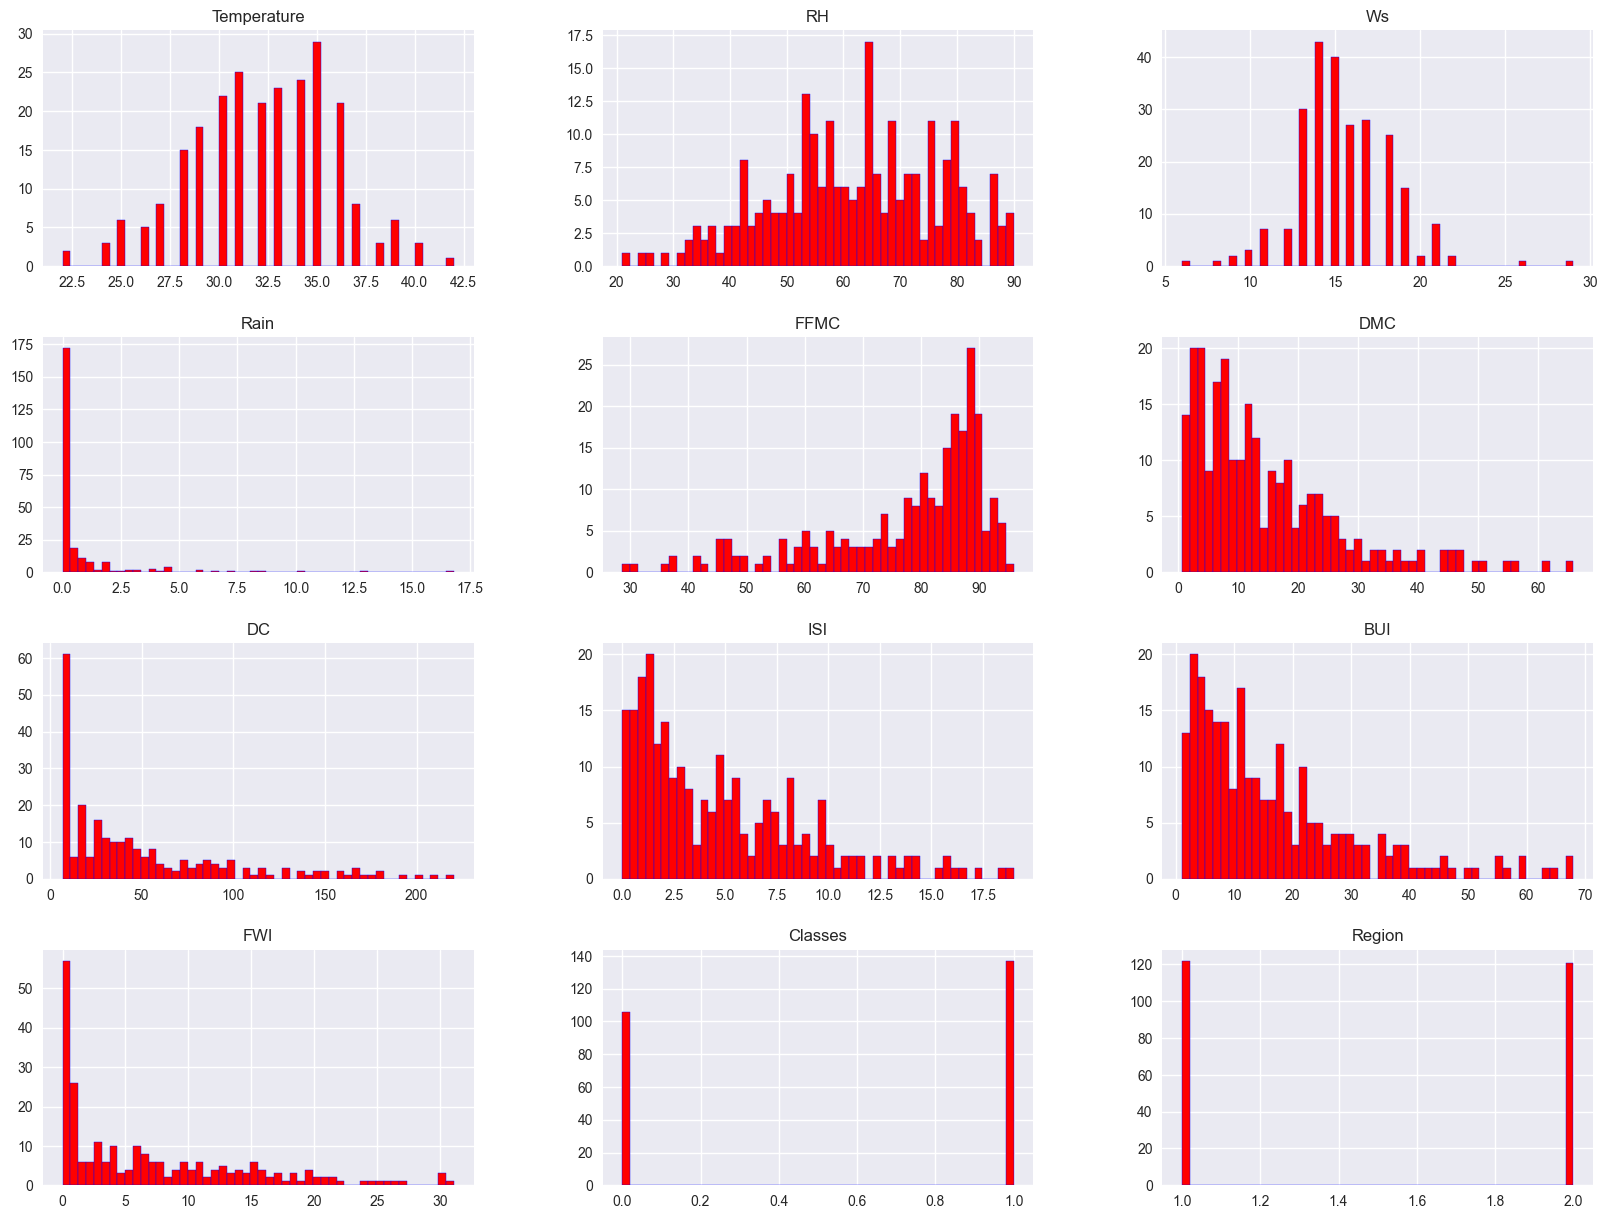

In [41]:
# plot dencity plot for all features
plt.style.use('seaborn')
df1.hist(bins=50,figsize=(20,15),ec='b',color="r")
plt.show()

In [42]:
percentage=df.Classes.value_counts(normalize=True)*100
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

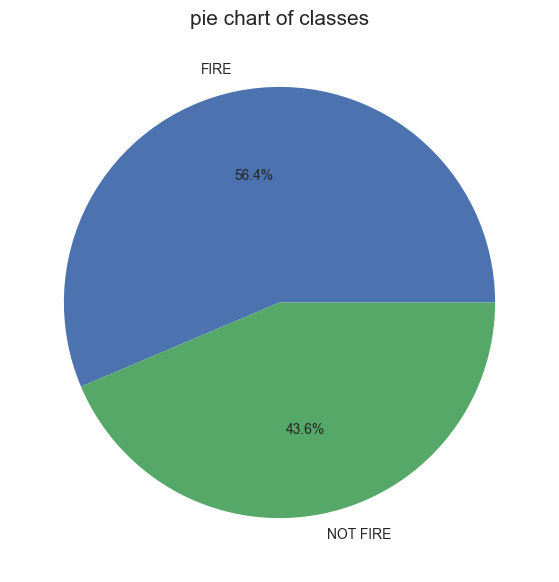

In [43]:
# ploting piechart
classeslabels=['FIRE','NOT FIRE']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classeslabels,autopct='%1.1f%%')
plt.title("pie chart of classes",fontsize=15)
plt.show()

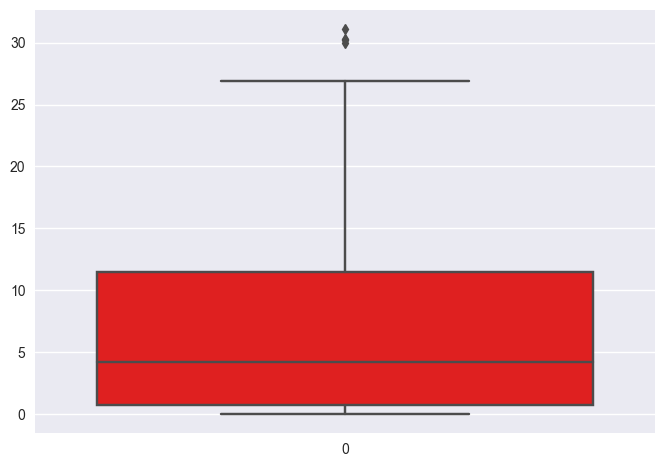

In [44]:
ax=sns.boxplot(df['FWI'],color='red')

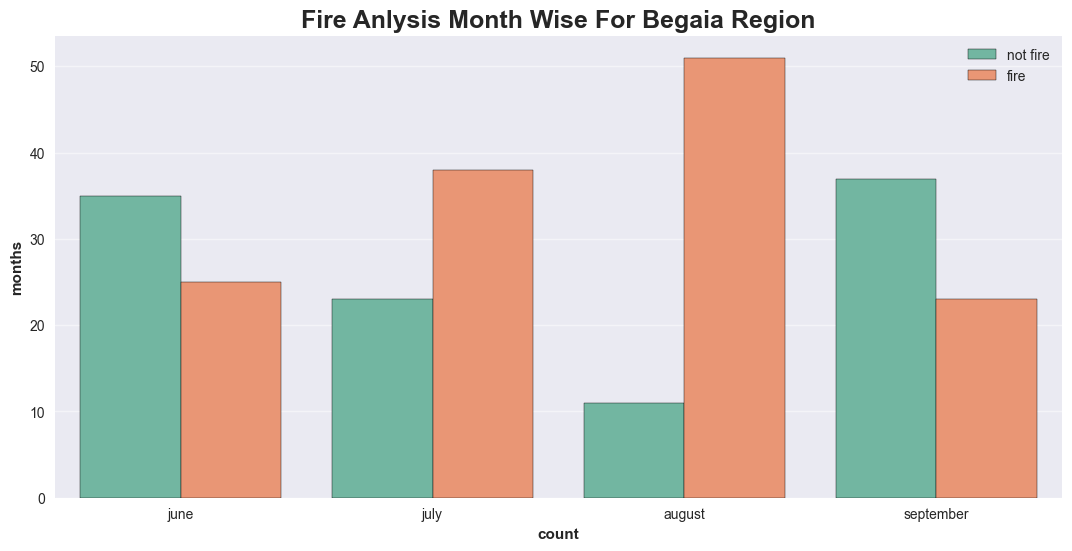

In [45]:
deftmp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df,ec='black',palette='Set2')
plt.title('Fire Anlysis Month Wise For Begaia Region',fontsize=18,weight='bold')
plt.xlabel('months',weight='bold')
plt.ylabel('count',weight='bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4),['june','july','august','september'])
plt.grid(alpha=0.5,axis='y')
plt.show()


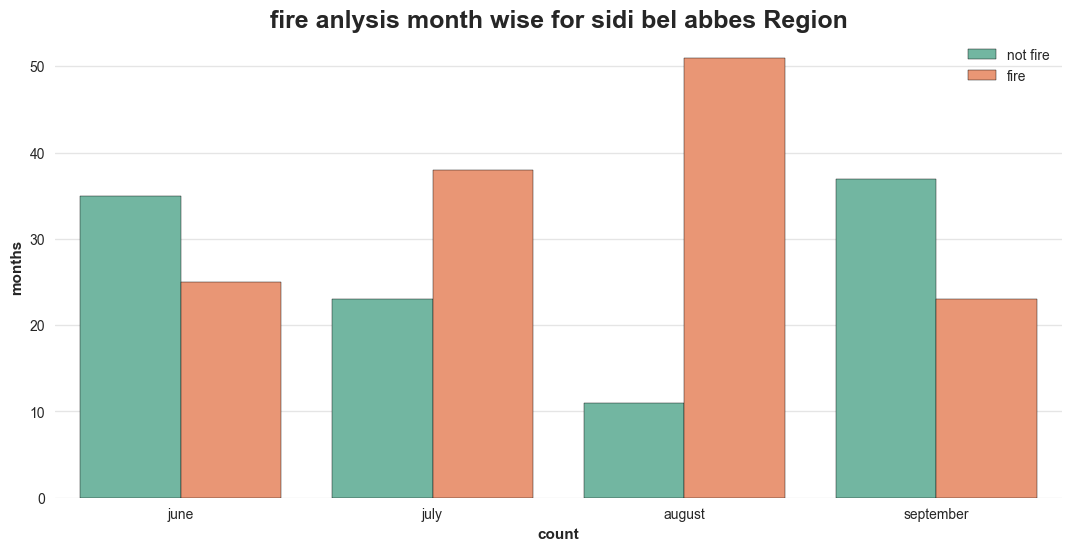

In [46]:
deftmp=df.loc[df['Region']==2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df,ec='black',palette='Set2')
plt.title('fire anlysis month wise for sidi bel abbes Region',fontsize=18,weight='bold')
plt.xlabel('count',weight='bold')
plt.ylabel('months',weight='bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4),['june','july','august','september'])
plt.grid(alpha=0.5,axis='y')
plt.show()

In [47]:
def barchart (feature,xlable):
    plt.figure(figsize=[14,8])
    by_feature=df1.groupby([feature],as_index=False)['Classes'].sum()
    ax=sns.barplot(x=feature,y='Classes',data=by_feature[[feature,'Classes']],estimator=sum)
    ax.set(xlabel='xlabel',ylabel='fire count')

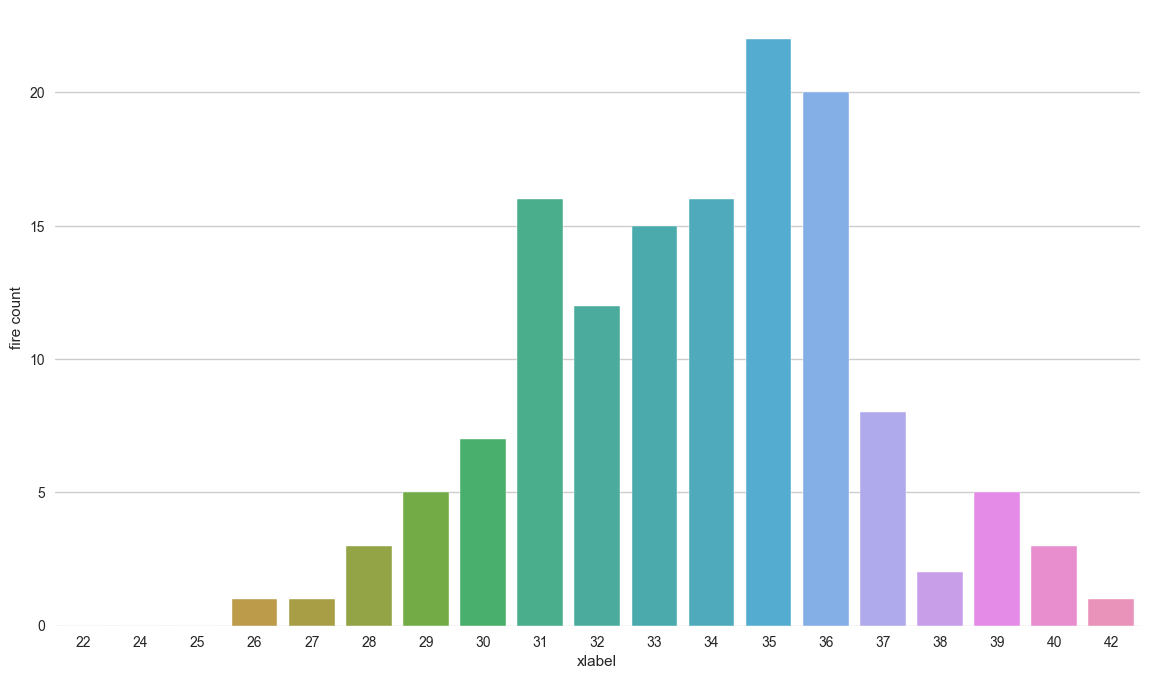

In [48]:
barchart('Temperature','Temperature Max in Celsius degrees ')

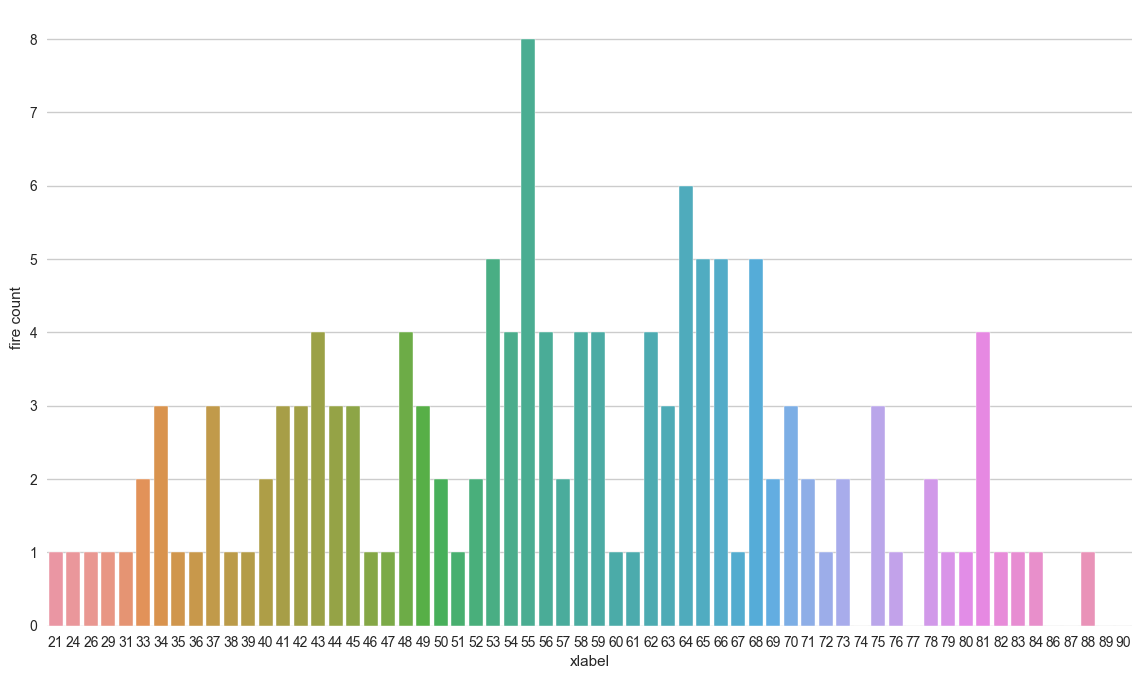

In [49]:
barchart('RH','RH max in percentage')

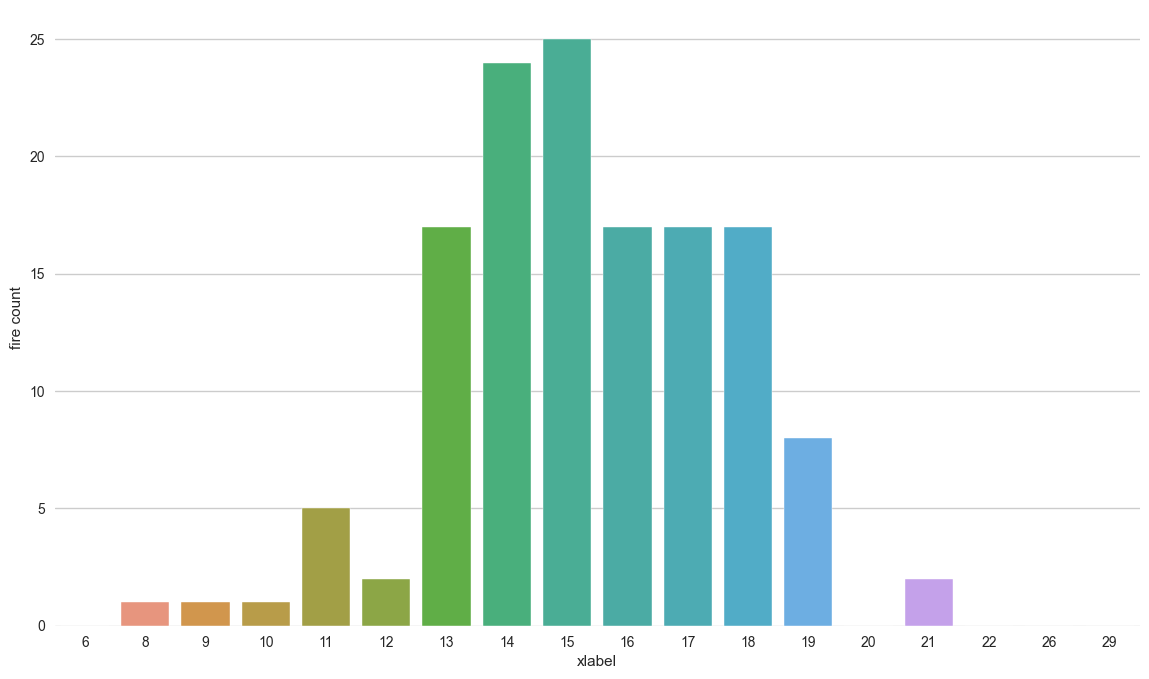

In [50]:
barchart('Ws','wind speed max in km/hr')

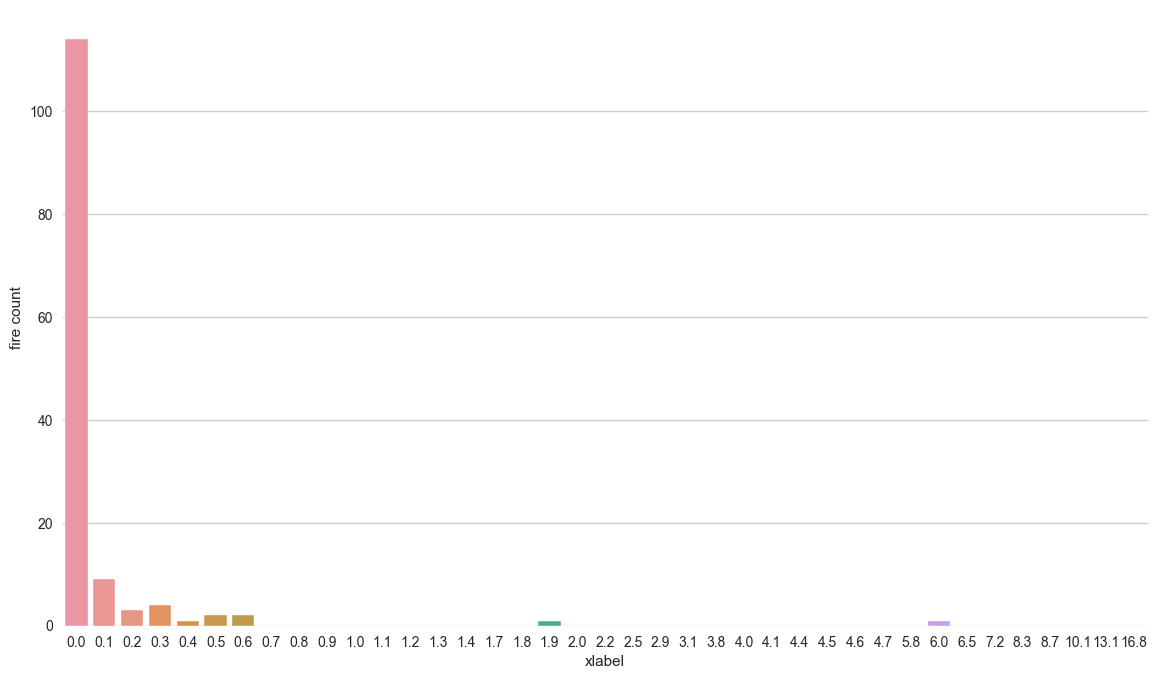

In [51]:
barchart('Rain','to very less rain')

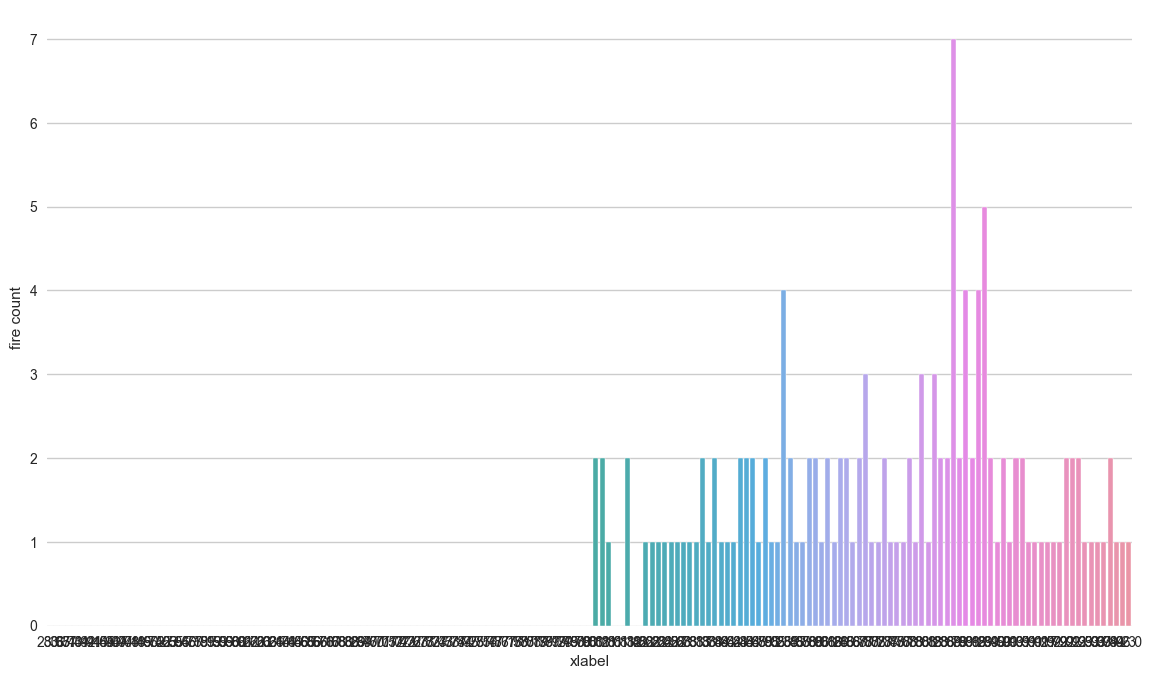

In [52]:
barchart('FFMC','Fine Fuel Moisture Code has higher chance of forest fires.')

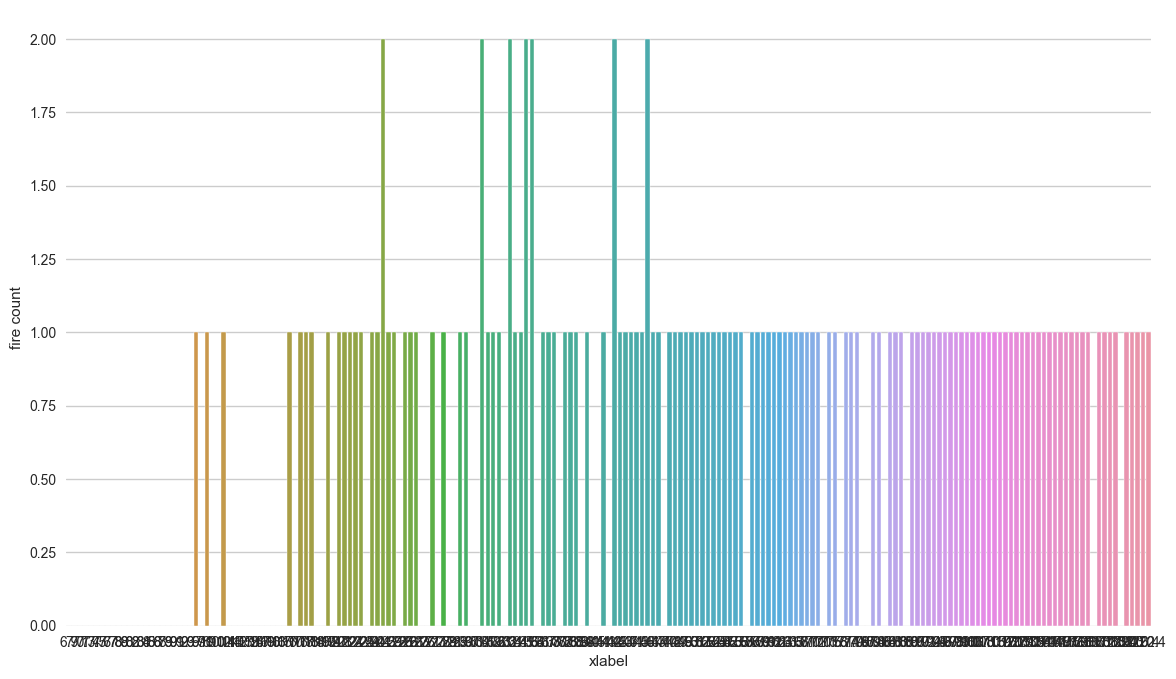

In [54]:
barchart('DC','Drought Code has higher chance of forest fires.')

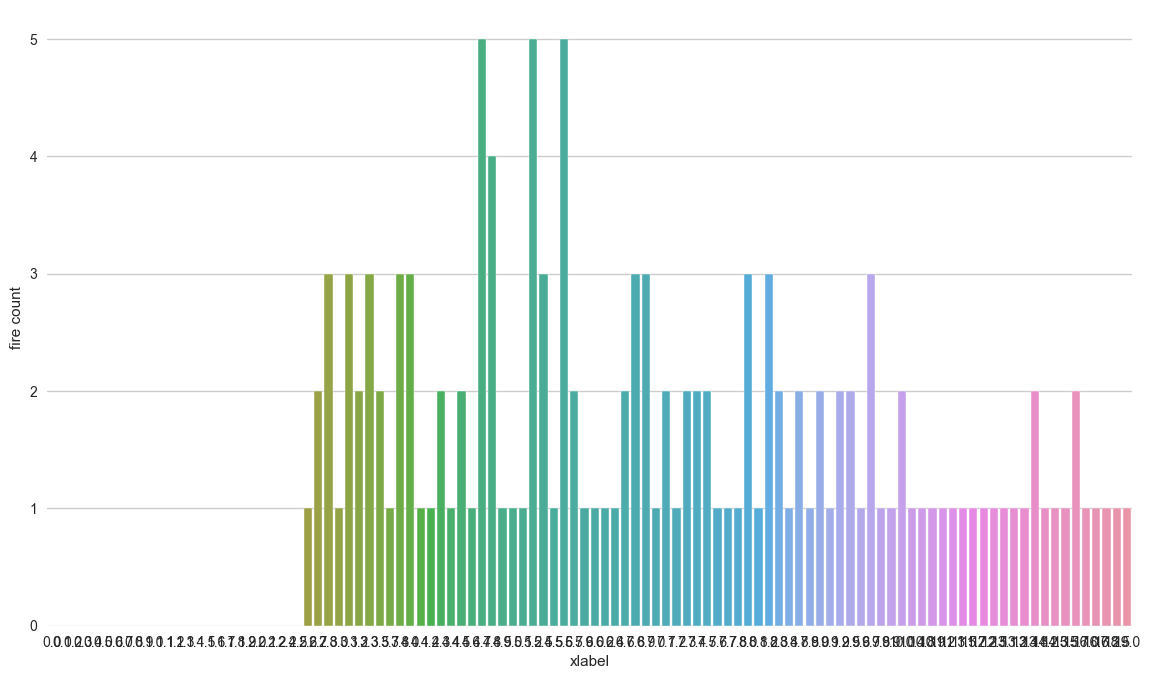

In [55]:
barchart('ISI','Initial Spread Index has higher chance of forest fires.')

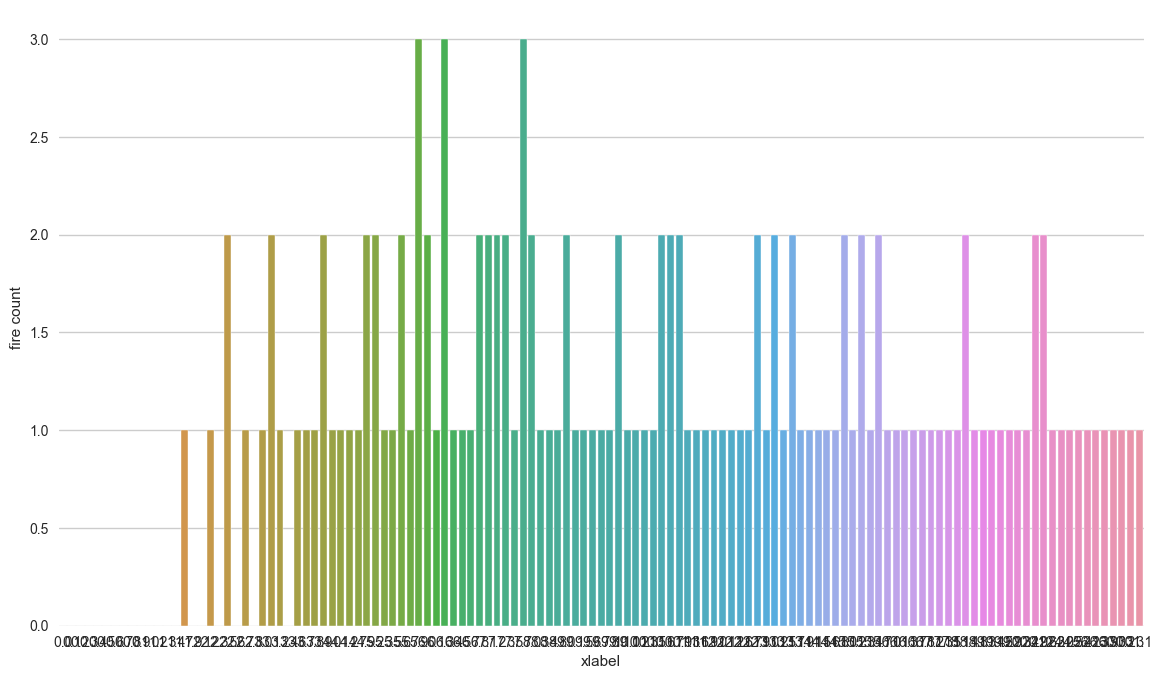

In [57]:
barchart('FWI','Fire Weather Index has higher chance of forest fires.')

In [ ]:
barchart('Region','reigon')

In [ ]:
dftemp=df1.drop(['Classes','Region'],axis=1)
fig=plt.figure(figsize=(12,6))
ax=dftemp.boxplot()
ax.set_title("boxplot of given dataset")
plt.show()

In [ ]:
detemp=detemp=df1.drop(['Region','Temperature','Rain','Ws','RH'],axis=1)
for feature in detemp:
    sns.histplot(data=detemp,x=feature,hue='Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

In [ ]:
# REPORT

In [ ]:
# Weather Systeam Report

# tempreature = Highest fire counts happened between 30-37 degree celsius
# Rain = Highest fire counts happened when there was no rain to very less rain ie.0.0 to 0.3.
# Wind Speed = Highest fire counts happened when the wind speed were between 13 to 19 Km/hr.
# Relative Humidity = Highest fire counts happened when the RH is between 50 to 80%.

In [ ]:
# FWI System Components Report
# FWI(Canadian Forest Fire Weather Index)

# Fine Fuel Moisture Code (FFMC)index which ranges between 2.8 to 92.5,here above 75 has higher chance
# of forest fires.

# Duff Moisture Code (DMC)index  which ranges between 1.1 to 65.9,here 1.1-10 has lower chance of forest
# fires whereas above 10-30 DMC has very high evidence of Forest Fires in past.

# Drought Code (DC)index which ranges between 7 to 220.4,here 0-25 is safe and has lower chance of forest
# fire whereas range above 25 DC has higher chance of forest fires.

# Initial Spread Index (ISI)index  which ranges between 0 to 18 here 0-3 has lower forest fire and above
# 3 ISI has higher chance of forest fires.

# Buildup Index (BUI)index which ranges between1.1 to 68,here1.1 to lower forest fire chance
#  and above 10 BUI has higher chance of forest fires.

# Fire Weather Index(FWI)index  which ranges between 1 to 31.1,here 0-3 has lower chance of forest
# fires and 3-25 FWI has higher chance of forest fires.